# Using CNNs with a regression head to predict material parameters from the time domain

In [1]:
import torch
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt


import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

from models.utils import identify_device, display_model
from models.Regression_models import CNN1D_Regressor, train_model
from models.regression_utils import get_train_val_loaders

In [2]:
device = identify_device()

# Load the dataset with weights_only=False
file_path = "regression_data/train_3_layer_512_nonoise_n1to8.pt"


train_loader, val_loader, num_samples = get_train_val_loaders(
    dataset_path=file_path,
    batch_size=32,
    val_split=0.1
)

Using device: mps
Loading data from regression_data/train_3_layer_512_nonoise_n1to8.pt
Dataset loaded successfully!
Number of samples: 512
Shape of input pulse: torch.Size([1, 1024]), target vector: torch.Size([9])


In [3]:
model_display = CNN1D_Regressor()
model = CNN1D_Regressor()
criterion = nn.SmoothL1Loss()
display_model(model_display, device=device)
epochs = 200
lr = 0.001

results = train_model(model, train_loader, val_loader, num_epochs=epochs, lr=lr, verbose_level='batch', device=device, loss_fn=criterion)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 64, 1024]             384
         GroupNorm-2             [-1, 64, 1024]             128
         MaxPool1d-3              [-1, 64, 512]               0
            Conv1d-4             [-1, 128, 512]          41,088
         GroupNorm-5             [-1, 128, 512]             256
         MaxPool1d-6             [-1, 128, 256]               0
            Conv1d-7             [-1, 256, 256]          98,560
         GroupNorm-8             [-1, 256, 256]             512
         MaxPool1d-9             [-1, 256, 128]               0
           Conv1d-10             [-1, 256, 128]         196,864
        GroupNorm-11             [-1, 256, 128]             512
        MaxPool1d-12              [-1, 256, 64]               0
AdaptiveAvgPool1d-13               [-1, 256, 1]               0
           Linear-14                   

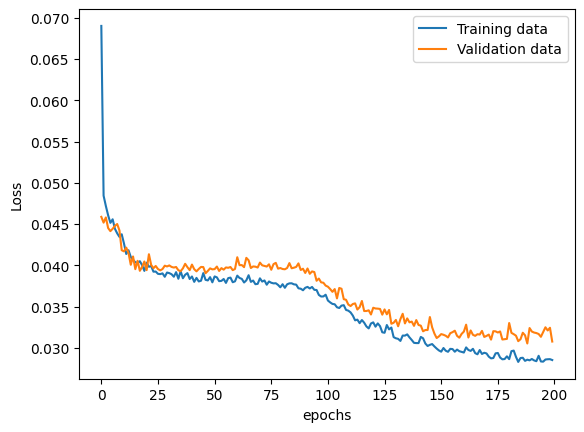

In [4]:
plt.plot(results[0], label='Training data')
plt.plot(results[1], label='Validation data')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
lr_str = str(lr).replace('.', '_')
filename = f'trained_models/regression_model_train_on_{int(num_samples/1000)}k_clean_lr{lr_str}_epochs_{int(epochs)}.pth'
torch.save(model.state_dict(), filename)
